# Import

In [2]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from utils import *

%load_ext autoreload
%autoreload 2

# 1. Iris dataset proprescessing & Class Labelling

In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [42]:
y['class'].unique()
# 데이터 전처리 
mapping = {'Iris-setosa': 1, 'Iris-versicolor': -1, 'Iris-virginica': 3}


y['result'] = y['class'].replace(mapping)
mask = y['result'] != 3

Y = y.loc[mask, 'result']
X_data = X.loc[mask, :]

print("X 데이터 : ", X_data.shape)
print("Y 데이터 : ",Y.shape)
X_data = standardize(X_data)

X 데이터 :  (100, 4)
Y 데이터 :  (100,)


/tmp/ipykernel_2568358/74578193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['result'] = y['class'].replace(mapping)


# 2. SVM 시작

## 2.1. CustomSVM & Sklearn SVM 인스턴스 생성 및 비교

In [43]:
# Smaples 데이터 만들어서 테스트 진행
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_data, Y, random_state=30)

In [44]:
from SVM import CustomSVM

svm = CustomSVM(X_sample_train.values, y_sample_train.values, C=1)
svm.fit()


     pcost       dcost       gap    pres   dres
 0: -2.6940e+00 -1.1192e+02  5e+02  2e+00  1e-15
 1: -9.4609e-01 -4.8062e+01  7e+01  2e-01  1e-15
 2:  1.3675e-01 -6.0217e+00  8e+00  1e-02  2e-15
 3: -2.8278e-01 -7.9881e-01  5e-01  2e-04  1e-15
 4: -4.9817e-01 -6.8992e-01  2e-01  4e-05  4e-16
 5: -5.8018e-01 -6.6874e-01  9e-02  5e-06  4e-16
 6: -6.1829e-01 -6.2044e-01  2e-03  1e-07  6e-16
 7: -6.1917e-01 -6.1919e-01  2e-05  1e-09  6e-16
 8: -6.1918e-01 -6.1918e-01  2e-07  1e-11  6e-16
Optimal solution found.
non-linear 실행


In [45]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_sample_train, y_sample_train)

SVC(C=1, kernel='linear')

In [46]:
# 결과값 비교
print("Custom Model SVM:")
print(f"Weights : {svm.w}")
print(f"Bias : {svm.b}")
print(f"Support Vectors:\n{svm.support_vector}")

print("\nScikit-learn Model SVM:")
print(f"Weights : {svm_model.coef_}")
print(f"Bias : {svm_model.intercept_}")
print(f"Support Vectors:\n{svm_model.support_vectors_}")


Custom Model SVM:
Weights : [-0.26923829  0.33785258 -0.70086955 -0.7486651 ]
Bias : -0.2471137596066947
Support Vectors:
[[-0.5810659  -1.25403558  0.09574666  0.55905661]
 [-0.89430898 -1.46515268  0.30389157  0.38157832]
 [-1.52079513 -1.67626978 -1.08374115 -0.8607697 ]
 [-0.5810659   0.43490123 -0.80621461 -0.50581312]]

Scikit-learn Model SVM:
Weights : [[-0.26940688  0.33825729 -0.70063615 -0.74890982]]
Bias : [-0.2468029]
Support Vectors:
[[-0.5810659  -1.25403558  0.09574666  0.55905661]
 [-0.89430898 -1.46515268  0.30389157  0.38157832]
 [-1.52079513 -1.67626978 -1.08374115 -0.8607697 ]
 [-0.5810659   0.43490123 -0.80621461 -0.50581312]]


## 2.2 decision boundary 시각화

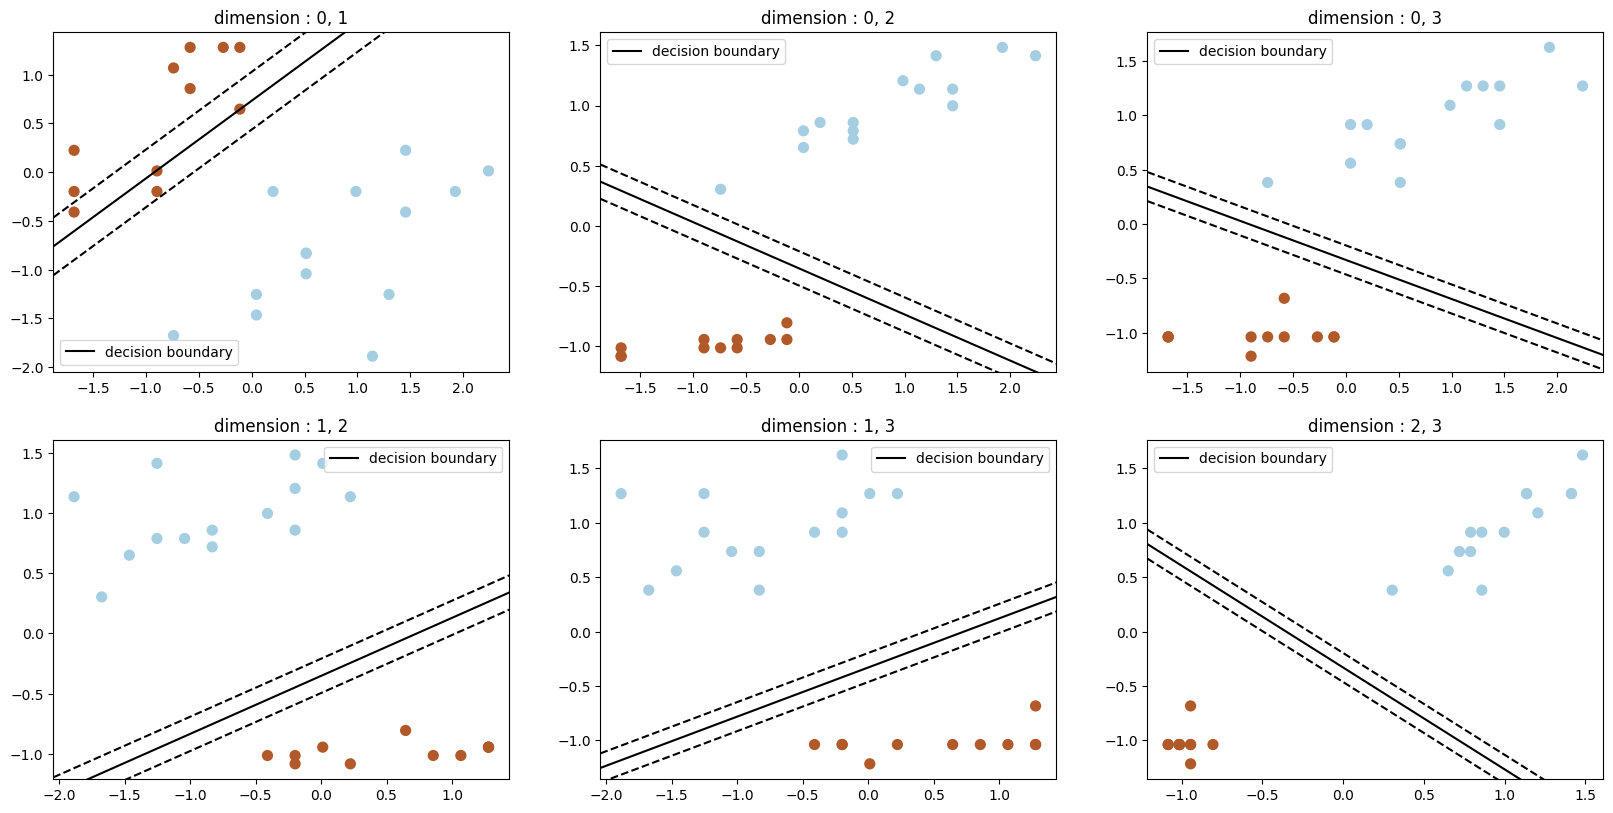

In [47]:
# 바운더리 설정
dims = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
svm.plot_svm(X_sample_test.values, y_sample_test.values, dims=dims)

## 2.3 Cross Validation 실행

In [48]:
from trains import svm_cross_validate

In [49]:
c_custom_to_accuracies,c_sklearn_to_accuracies = svm_cross_validate(X_data.values, Y.values)

non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
non-linear 실행
정확도 : 100.0%
n

### 2.3.1 Custom SVM 모델 K-fold 결과

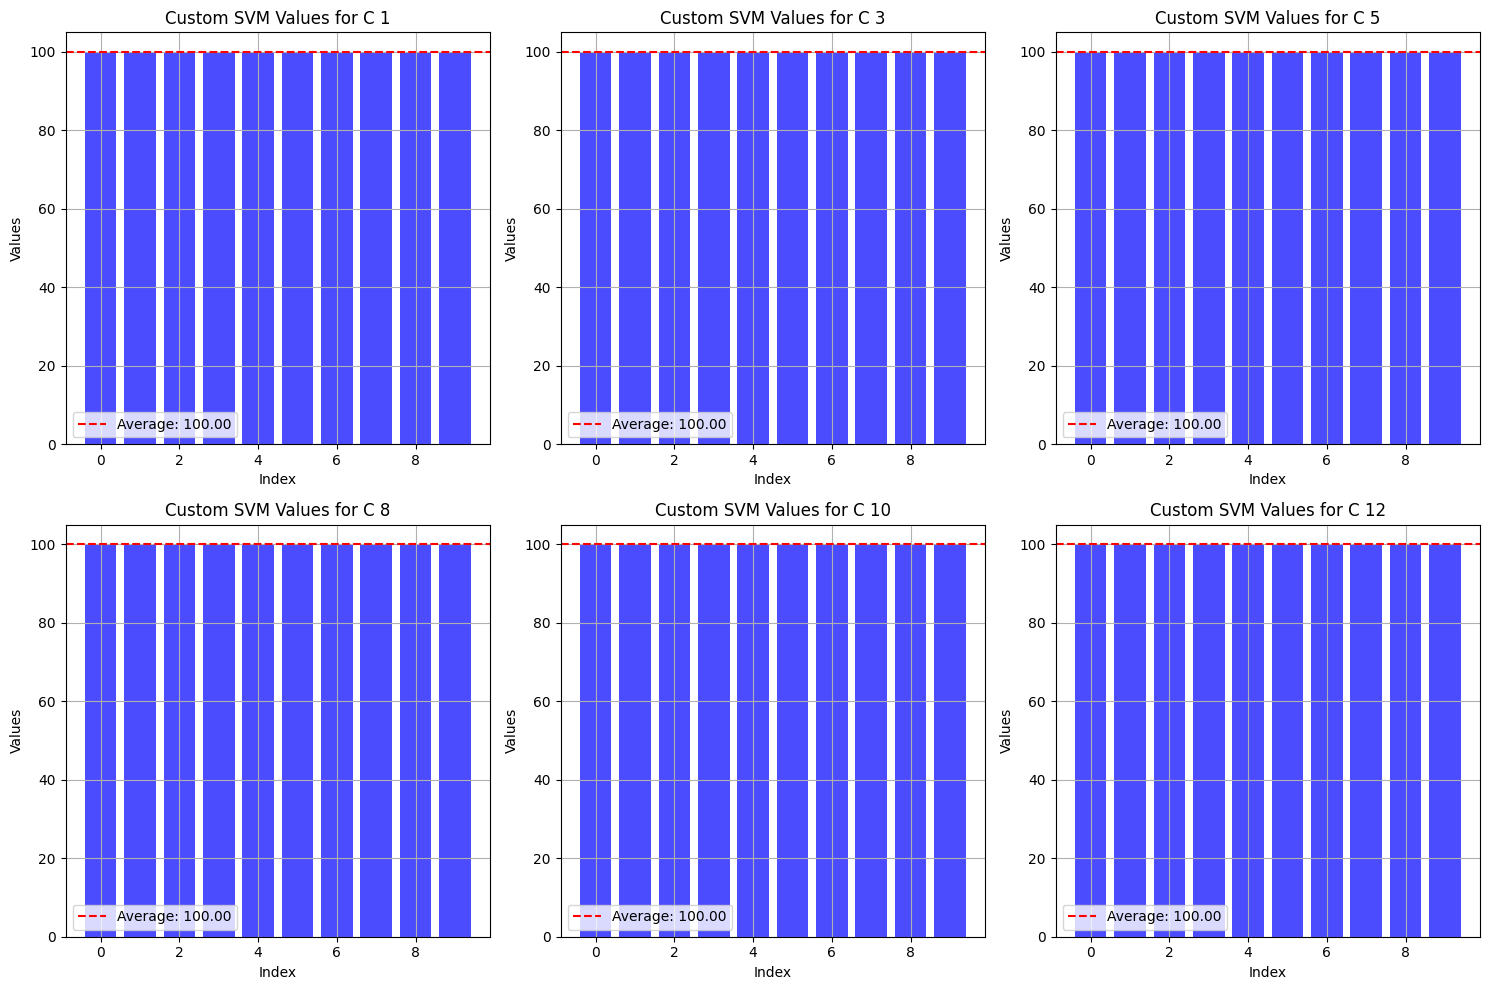

In [50]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
for idx, (key, values) in enumerate(c_custom_to_accuracies.items(), 1):
    average_value = sum(values) / len(values)
    plt.subplot(2, 3, idx)
    plt.bar(range(len(values)), values, color='blue', alpha=0.7)
    plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Custom SVM Values for C {key}')
    plt.legend()
    
    plt.grid(True)

plt.tight_layout()
plt.show()



### 2.3.2 sklearn SVM 모델 K-fold 결과

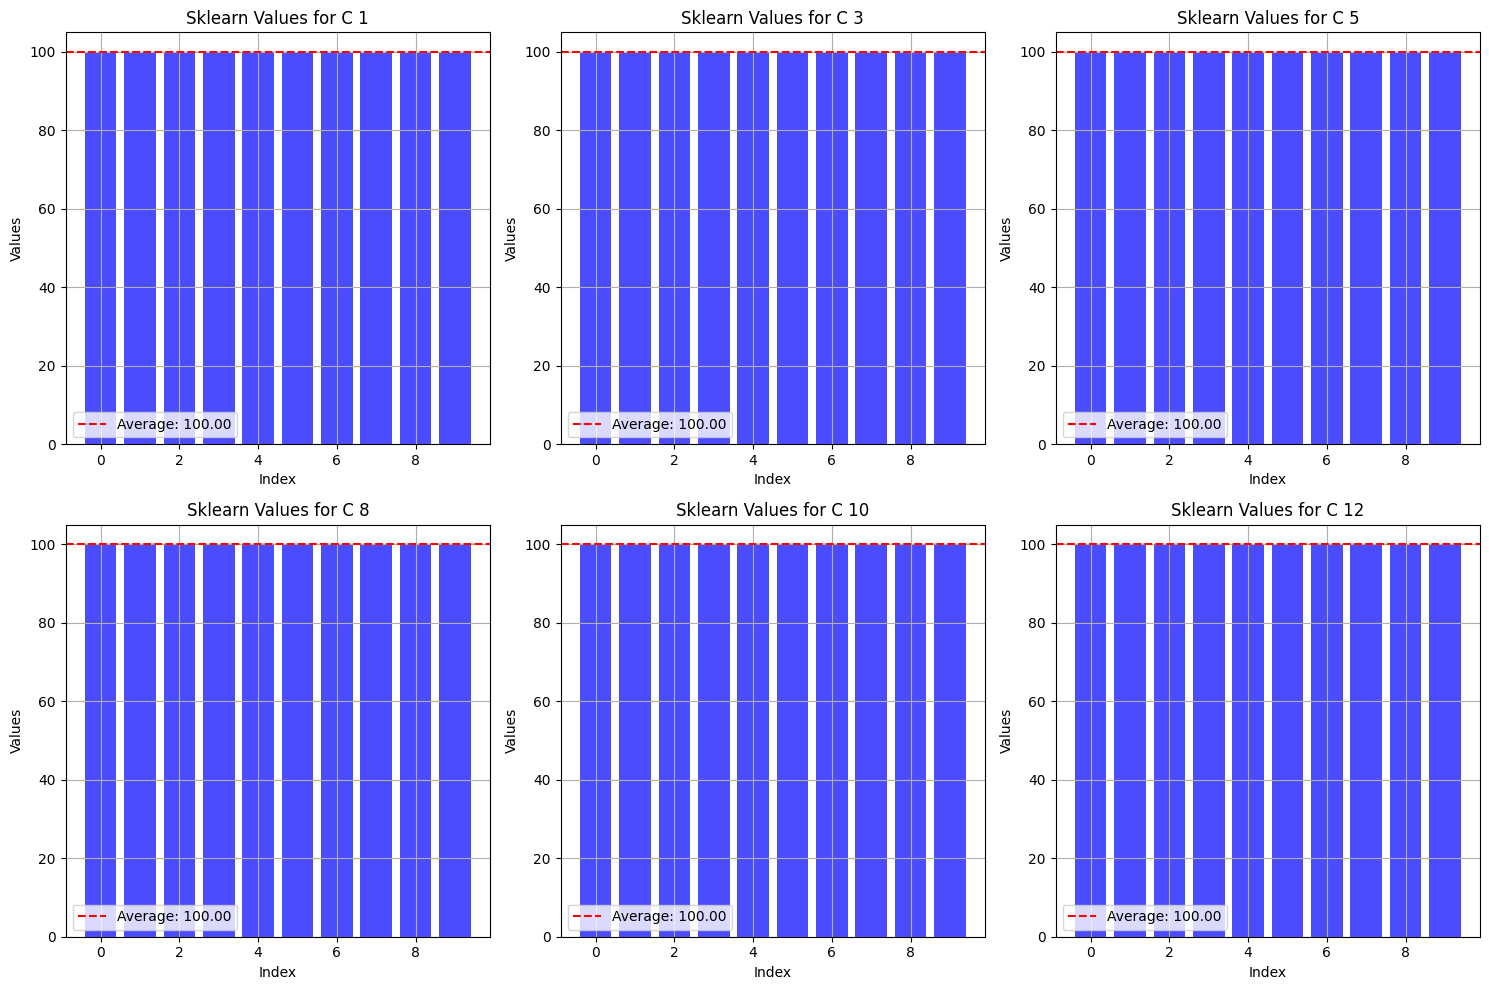

In [51]:
plt.figure(figsize=(15, 10))
for idx, (key, values) in enumerate(c_sklearn_to_accuracies.items(), 1):
    average_value = sum(values) / len(values)
    
    plt.subplot(2, 3, idx)
    
    plt.bar(range(len(values)), values, color='blue', alpha=0.7)
    
    plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Sklearn Values for C {key}')
    plt.legend()
    
    plt.grid(True)

plt.tight_layout()
plt.show()

# 2. 최종 SVM 설정

In [52]:
np.random.seed(42)
# 최종 데이터 구축
final_x_train , final_x_test, final_y_train,final_y_test= get_split_data(X_data, Y)

In [53]:
print(final_x_train.shape)
print(final_y_train.shape)

(80, 4)
(80,)


In [54]:
svm = CustomSVM(final_x_train, final_y_train, C=5)
svm.fit(option=False)

non-linear 실행


In [55]:
pred_test = svm.predict(final_x_test)
print((pred_test == final_y_test).sum())

20


[[12.  0.]
 [ 0.  8.]]


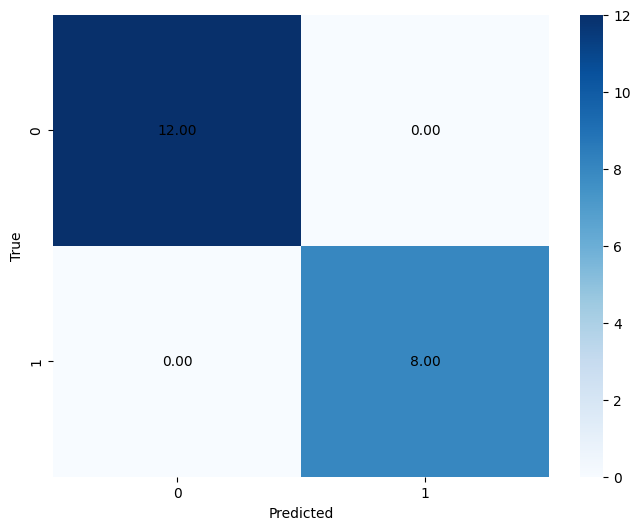

In [56]:
from trains import confusion_matrix

conf = confusion_matrix(pred_test, final_y_test, list(np.unique(final_y_train)))

print(conf)
plt.figure(figsize=(8, 6))

sns.heatmap(conf, annot=True, cmap='Blues', fmt=".2f", annot_kws={"color": "black"})

plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("./fig/svm_confusion_matrix.png")
plt.show()

# 3. Random Forest 설정

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [10]:
y['class'].unique()
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y['result'] = y['class'].replace(mapping)

X_data = standardize(X)
y = y['result']


C:\Users\a\AppData\Local\Temp\ipykernel_1732\3026802408.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['result'] = y['class'].replace(mapping)
C:\Users\a\AppData\Local\Temp\ipykernel_1732\3026802408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['result'] = y['class'].replace(mapping)


## 3.1 random forest parameter 설정

최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 8}
최고 예측 정확도: 0.9481
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 4}
최고 예측 정확도: 0.9556
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 4}
최고 예측 정확도: 0.9556
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 2}
최고 예측 정확도: 0.9630
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 2}
최고 예측 정확도: 0.9778
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2}
최고 예측 정확도: 0.9852
최적 하이퍼 파라미터:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 2}
최고 예측 정확도: 0.9704
최적 하이퍼 파라미터:  {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 8}
최고 예측 정확도: 0.9704
최적 하이퍼 파라미터:  {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split':

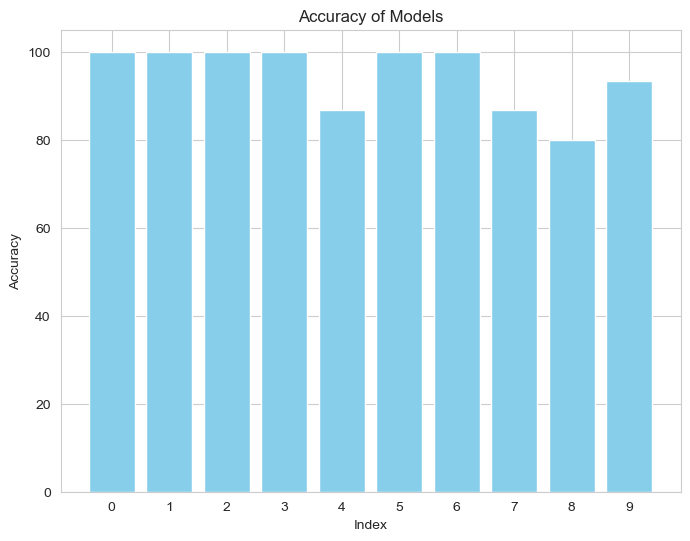

In [11]:
from trains import get_parameter_random_forest, random_forest_cross_validate, grid_plot_rf, find_best_model

# 하이퍼 파라미터 값 얻음
parm= get_parameter_random_forest()
# 데이터 결과 dict 으로 저장
rf_dict = random_forest_cross_validate(X_data.values, y.values, params=parm)

# 결과 시각화
grid_plot_rf(rf_dict)
# 최적에 값 받기
_, parameters, acc = find_best_model(rf_dict)

In [12]:
print(parameters)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 8}


In [13]:
final_x_train, final_x_test, final_y_train, final_y_test = get_split_data(X_data, y)

## 결과 계산하기

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(**parameters)
clf.fit(final_x_train,final_y_train)

predict = clf.predict(final_x_test)
print((predict == final_y_test).sum() / len(final_y_test) * 100)

96.66666666666667


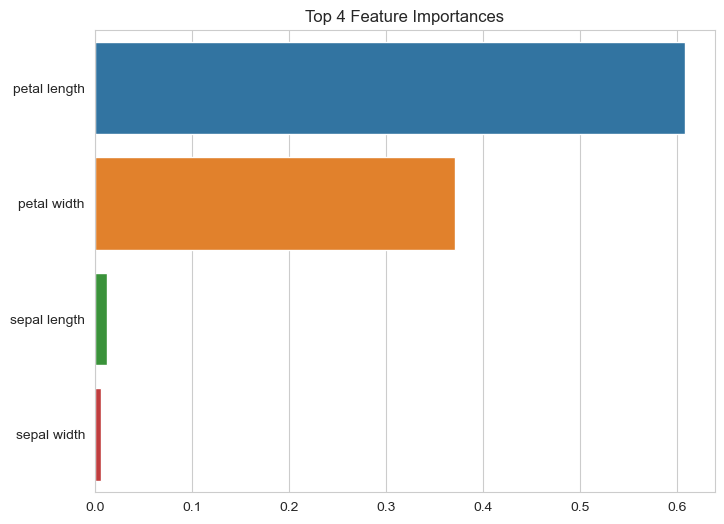

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

importances_values = clf.feature_importances_
importances = pd.Series(importances_values, index = X.columns)
ftr_top = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## 3.2 최종 random forest 

[[10.  0.  0.]
 [ 0.  8.  0.]
 [ 0.  2. 10.]]


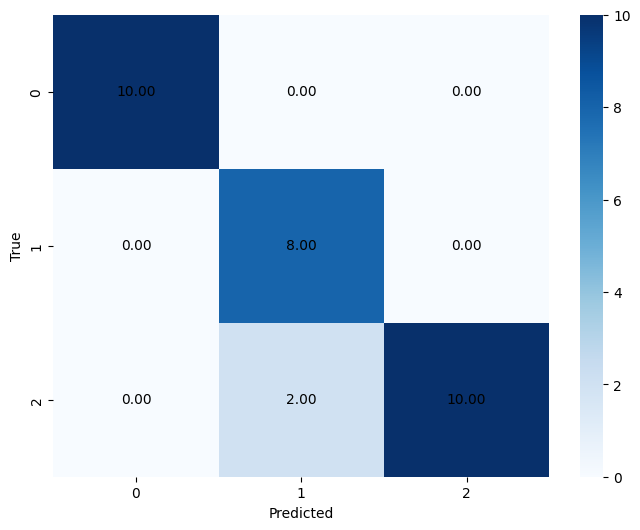

In [63]:
from trains import confusion_matrix

#confusion_matrix 반환하도록 설정
conf = confusion_matrix(predict, final_y_test, list(np.unique(final_y_train)))

# 마지막으로 시각화 하기 좋게 Plot 그린다.
print(conf)
plt.figure(figsize=(8, 6))

# 히트맵 그리기
sns.heatmap(conf, annot=True, cmap='Blues', fmt=".2f", annot_kws={"color": "black"})

plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("./fig/svm_confusion_matrix.png")
plt.show()